Tokenize is done.
Number of tokens: 2560
Words-id-words is done.
Generating of training data with the window size(4) is done.
Length of train data: 20460
Training start.


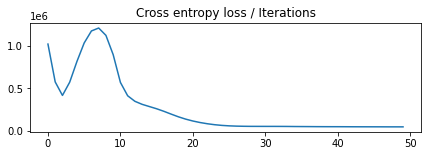

Training is done.
You may get embedings for 'word' try: model.get_embedding('word')



In [1]:
from simple_embedings import SimpleEmbedings
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

from sklearn.manifold import TSNE


with open('alice_in_wonderland.txt', 'r') as f:
    text = f.read()
        
model = SimpleEmbedings(emb_dim=200, window=4)
model.make_embedings(text, info=True)

In [2]:
keys = ['alice', 'queen', 'queens', 'friend', 'friends', 'red', 'white', 'tea', 'dream']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word in model.similarity(word, 13, outlist=True):
        words.append(similar_word)
        embeddings.append(model.get_embedding(similar_word))
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

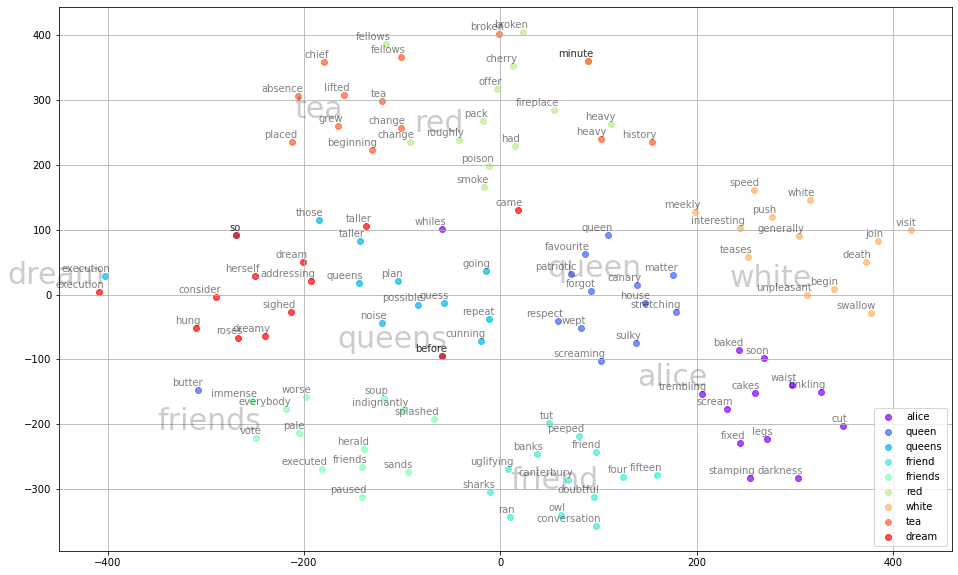

In [3]:
def tsne_plot_similar_words(labels, embedding_clusters, word_clusters, a=0.7):
    plt.figure(figsize=(16, 10))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for n, (label, embeddings, words, color) in enumerate(zip(labels, embedding_clusters, word_clusters, colors)):
        x = embeddings[:,0]
        y = embeddings[:,1]
        plt.scatter(x, y, c=[color], alpha=a, label=label)
        plt.annotate(keys[n], alpha=0.2, xy=(x[0], y[0]), xytext=(5, 2), 
                         textcoords='offset points', ha='right', va='bottom', size=30)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2), 
                         textcoords='offset points', ha='right', va='bottom', size=10)
    plt.legend(loc=4)
    plt.grid(True)
    plt.show()

    
    
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)


tsne_plot_similar_words(keys, embeddings_en_2d, word_clusters)